# Hackathon Example

Das Ziel des Hackathons ist, Energiedaten zu kombinieren und interessante Resultate zu visualisieren. Dazu verwenden wir am besten Jupyter Notebooks wie dieses hier.

In einem Notebook können wir Markdown-Code mit Python kombinieren, die einzelnen Code-Blöcke immer wieder anpassen, und die Resultate inspizieren.

## Tools

### Python
Selbstredend. [Download hier](https://www.python.org/).

### Jupyter Notebook Extension

Extension von Visual Studio Code. [Hier installieren](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter).

### Bibliotheken
  * Matplotlib: Eine Python-Bibliothek (also eine Sammlung von Funktionen), um mit Python schöne Grafiken zu erstellen.
  * Pandas: Data-Science Bibliothek ([Intro](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas))
  * Geopandas: Erweiterungen für Pandas, um mit Geodaten umzugehen - [Intro](https://geopandas.org/en/stable/getting_started/introduction.html#)
  * Folium: Webseiten erstellen mit Geoinhalten.

### Installation
Generell lassen sich gängige Bibliotheken vom Terminal mit `pip` installieren
```bash
python -m pip install matplotlib pandas folium
```
Wir können alternativ aber auch einfach sicherstellen, dass der _Kernel_, der den Python-Code dieses Notebooks ausführt, die Bibliotheke installiert hat:

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib pandas folium geopandas geopy mapclassify

## Comma-Separated Values

Wir wollen die öffentlich verfügbaren Datensätze verarbeiten. Die tabellarischen Daten liegen oft im CSV-Format (Comma-Separated Values) vor. Dabei repräsentiert jede Zeile ein Eintrag, wobei die Werte der einzelnen Spalten mit Kommas (manchmal auch Semikolons) abgetrennt sind. Enthält ein Wert ein Komma, kann der Wert in Anführungszeichen eingeschlossen sein. Die erste Zeile enthält oft die Spaltennamen:

```
Postleitzahl,Ort,Einwohner
8590,Romanshorn,11296
8580,Amriswil,14157
9320,Arbon,14872
```

Wir verwenden gleich die Pandas-Bibliothek, um CSV zu lesen.

Zum Beispiel möchten wir mit den Daten zur Energieproduktion der Thurgauer Gemeinden arbeiten. Das Dataset findet sich unter https://data.tg.ch/explore/dataset/div-energie-10/table/, den Link zum CSV-Download findet sich unter _Exporte_. Der Download verwendet Semikolons.

Die Spaltennamen entnehmen wir ebenfalls der Webseite, um die Gemeinde und deren Energieproduktion zu erhalten.

In [7]:
import pandas as pd

source = 'https://data.tg.ch/api/explore/v2.1/catalog/datasets/div-energie-10/exports/csv'

# CSV-Daten mit Pandas lesen.
# Achtung: wir verwenden Semikolons statt Kommas als Trennzeichen.
# header=0 teilt der Funktion mit, dass wir Spaltenheader in der Datei erwarten.
energy_dataset = pd.read_table(source, sep=';', header=0)
# Wie sehen die Daten aus?
energy_dataset

,jahr,bfs_nr_gemeinde,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total
0,2020,4881,Amlikon-Bissegg,1329,NaN,NaN,3.894,NaN,NaN,NaN,4.366,NaN,8.260
1,2020,4461,Amriswil,14157,NaN,NaN,NaN,NaN,NaN,NaN,5.061,NaN,5.061
2,2020,4891,Berg (TG),3420,NaN,NaN,0.730,NaN,NaN,NaN,2.475,0.005,3.210
3,2020,4901,Birwinken,1330,NaN,NaN,NaN,NaN,NaN,NaN,0.971,NaN,0.971
4,2020,4471,Bischofszell,5878,2.813,NaN,NaN,NaN,NaN,1.336,2.102,NaN,6.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2015,4871,Wagenhausen,1672,NaN,NaN,NaN,NaN,NaN,NaN,0.259,NaN,0.259
476,2015,4946,Weinfelden,11147,8.266,NaN,NaN,39.873,NaN,0.474,2.011,NaN,50.624
477,2015,4951,Wigoltingen,2369,NaN,NaN,0.398,NaN,NaN,NaN,1.254,NaN,1.652
478,2015,4791,Wuppenau,1120,NaN,NaN,NaN,NaN,NaN,NaN,0.720,NaN,0.720


`NaN` steht übrigens für _Not a Number_ - bedeutet also, dass hier keine Werte verfügbar sind.

Für den Anfang interessieren uns nur die Werte 2020. Zudem möchten wir nur die Gemeinde und die totale Energieproduktion.

Filtern können wir die Daten, indem wir ein Bool-Array übergeben, das die gleiche Länge hat wie das Dataset.

Spalten einschränken können wir, indem wir eine Liste der gewünschten Spaltennamen übergeben.

In [9]:
only2020 = energy_dataset[energy_dataset['jahr'] == 2020]
only2020 = only2020[['bfs_nr_gemeinde', 'gemeinde_name', 'einwohner', 'wasserkraft', 'biomasse_holz', 'biogasanlagen_landwirtschaft', 'kehricht', 'biogasanlagen_industrie', 'biogasanlagen_abwasser', 'photovoltaik', 'wind', 'total']]

# Also, use `bfs_nr_gemeinde` as Index for our data
only2020.set_index('bfs_nr_gemeinde', inplace=True)
only2020

,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total
bfs_nr_gemeinde,,,,,,,,,,,
4881,Amlikon-Bissegg,1329,NaN,NaN,3.894,NaN,NaN,NaN,4.366,NaN,8.260
4461,Amriswil,14157,NaN,NaN,NaN,NaN,NaN,NaN,5.061,NaN,5.061
4891,Berg (TG),3420,NaN,NaN,0.730,NaN,NaN,NaN,2.475,0.005,3.210
4901,Birwinken,1330,NaN,NaN,NaN,NaN,NaN,NaN,0.971,NaN,0.971
4471,Bischofszell,5878,2.813,NaN,NaN,NaN,NaN,1.336,2.102,NaN,6.251
...,...,...,...,...,...,...,...,...,...,...,...
4701,Wäldi,1055,NaN,NaN,NaN,NaN,NaN,NaN,1.552,NaN,1.552
4946,Weinfelden,11588,8.097,NaN,NaN,57.317,NaN,2.194,5.565,NaN,73.173
4951,Wigoltingen,2560,NaN,NaN,0.600,NaN,NaN,NaN,2.522,NaN,3.122


## Aufgabe 1: Daten generieren

Erstelle ein Dataset ähnlich wie `only2020`, aber füge zusätzlich eine Spalte `strom_pro_kopf` hinzu, die die Stromproduktion pro Einwohner berechnet.

In [10]:
only2020['pv_pro_kopf_mwh'] = only2020['photovoltaik'] / only2020['einwohner'] * 1000
only2020['produktion_pro_kopf_mwh'] = only2020['total'] / only2020['einwohner'] * 1000
only2020

,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total,pv_pro_kopf_mwh,produktion_pro_kopf_mwh
bfs_nr_gemeinde,,,,,,,,,,,,,
4881,Amlikon-Bissegg,1329,NaN,NaN,3.894,NaN,NaN,NaN,4.366,NaN,8.260,3.285177,6.215199
4461,Amriswil,14157,NaN,NaN,NaN,NaN,NaN,NaN,5.061,NaN,5.061,0.357491,0.357491
4891,Berg (TG),3420,NaN,NaN,0.730,NaN,NaN,NaN,2.475,0.005,3.210,0.723684,0.938596
4901,Birwinken,1330,NaN,NaN,NaN,NaN,NaN,NaN,0.971,NaN,0.971,0.730075,0.730075
4471,Bischofszell,5878,2.813,NaN,NaN,NaN,NaN,1.336,2.102,NaN,6.251,0.357605,1.063457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,Wäldi,1055,NaN,NaN,NaN,NaN,NaN,NaN,1.552,NaN,1.552,1.471090,1.471090
4946,Weinfelden,11588,8.097,NaN,NaN,57.317,NaN,2.194,5.565,NaN,73.173,0.480238,6.314550
4951,Wigoltingen,2560,NaN,NaN,0.600,NaN,NaN,NaN,2.522,NaN,3.122,0.985156,1.219531


## Daten zusammenfassen und Visualisieren

Wir möchten die Daten als Karte visualisieren. Im `data` Ordner hat es ein Dataset, das die Grenzen aller Schweizer Körperschaften (Gemeinden, Bezirke, Kantone) als Polygone enthält. Es liegt im JSON-Format vor, sieht also so aus:

```
{
    "type": "Feature",
    "properties": {
        "bfs_nr_gemeinde": 3762,
        "country": "CH",
        "type": "Gemeinde",
        "name": "Scuol"
    },
    "geometry": {
        "type": "MultiPolygon",
        "coordinates": [ [ [ [ 1139077.531999999890104, 5921141.517 ], ...] ] ]
    }
}
...
```

Geopandas erlaubt uns, dieses Format direkt einzulesen und zu inspizieren. Es lohnt sich, diesen Schritt in einem separaten Block auszuführen, weil doch 90MByte an Daten eingelesen werden.

In [12]:
import geopandas as gpd
municipalities = gpd.read_file("../data/towns_fixed.geojson")
municipalities.set_index('bfs_nr_gemeinde', inplace=True)
municipalities

,name,kanton,population,area,geometry
bfs_nr_gemeinde,,,,,
3762,Scuol,18.0,4650.0,43861.0,"POLYGON Z ((2812956.113 1194956.023 2980.122, ..."
1631,Glarus Süd,8.0,9490.0,43003.0,"POLYGON Z ((2715953.052 1184819.358 3402.836, ..."
3746,Zernez,18.0,1513.0,34404.0,"POLYGON Z ((2803369.136 1191207.211 3111.081, ..."
3543,Surses,18.0,2391.0,32377.0,"POLYGON Z ((2757776.421 1165789.462 2730.100, ..."
6037,Val de Bagnes,23.0,10609.0,30191.0,"POLYGON Z ((2588810.990 1085590.669 3576.258, ..."
...,...,...,...,...,...
4257,Olsberg,19.0,NaN,NaN,"POLYGON Z ((2627214.259 1260872.131 482.512, 2..."
3104,Schlatt-Haslen,16.0,NaN,NaN,"POLYGON Z ((2745229.705 1250219.359 783.966, 2..."
3111,Oberegg,16.0,NaN,NaN,"POLYGON Z ((2763958.831 1257025.919 643.663, 2..."


### Join

Nun wollen wir die beiden Datasets (Energiedaten, Geometrie) verbinden. Eine solche Verbindung heisst _Join_, in unserem Fall handelt es sich um einen _Inner Join_ - d.h. dass alle Zeilen der beiden Datensets entfernt werden, die nicht über eine gemeinsame Spalte (den _Key_) verbunden werden können. Der Key ist bei uns die Nummer des BFS (Bundesamt für Statistik) `bfs_nr_gemeinde`, die in beiden Datasets enthalten ist.

In [14]:
# Inner Join of municipalities geo data with energy data from 2020
# Inner Join means: we only keep rows that have the same number in bfs_nr_gemeinde and discard anything else.
# meaning: we remove any row in the huge dataset that is not in the set of Thurgau towns.
import pandas as pd

joined = pd.merge(municipalities, only2020, how="inner", on="bfs_nr_gemeinde")
joined.head()

,name,kanton,population,area,geometry,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total,pv_pro_kopf_mwh,produktion_pro_kopf_mwh
bfs_nr_gemeinde,,,,,,,,,,,,,,,,,,
4726,Fischingen,20.0,2868.0,3058.0,"POLYGON Z ((2711241.184 1254086.875 853.137, 2...",Fischingen,2831,NaN,NaN,0.294,NaN,NaN,NaN,2.238,NaN,2.532,0.790533,0.894384
4566,Frauenfeld,20.0,25971.0,2735.0,"POLYGON Z ((2709112.644 1265190.684 547.110, 2...",Frauenfeld,25810,1.327,NaN,1.465,NaN,1.819,1.229,11.151,NaN,16.991,0.432042,0.658311
4666,Kemmental,20.0,2631.0,2504.0,"POLYGON Z ((2724930.940 1274359.240 462.811, 2...",Kemmental,2592,NaN,NaN,NaN,NaN,NaN,NaN,2.920,NaN,2.920,1.126543,1.126543
4816,Homburg,20.0,1555.0,2413.0,"POLYGON Z ((2713533.070 1278761.374 443.200, 2...",Homburg,1544,NaN,NaN,NaN,NaN,NaN,NaN,1.944,NaN,1.944,1.259067,1.259067
4551,Aadorf,20.0,9359.0,1994.0,"POLYGON Z ((2709112.644 1265190.684 547.110, 2...",Aadorf,9198,0.174,NaN,NaN,NaN,NaN,0.010,3.780,NaN,3.964,0.410959,0.430963


### Darstellung

Schliesslich verwenden wir `geopandas` um die Daten auf einer Karte darzustellen. Der erzeugte Plot könnte beispielsweise in einer Arbeit, einem Poster oder einer Präsentation verwendet werden.

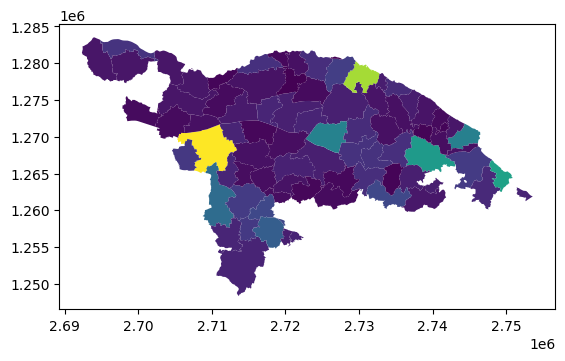

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set up pyplot
fig, ax = plt.subplots()

# Plot geometry and color by column 'einwohner'
joined.plot("einwohner", ax=ax)

# Show!
plt.savefig('../output/tg.png', bbox_inches='tight')
plt.show()

#### Interaktives Overlay mit OpenStreetMap

Wollen wir eine interaktive Karte, so verwenden wir `geopandas.explore` um ein `folium` Overlay zu generieren. Die Karte kann entweder direkt im Notebook angezeigt werden oder in eine HTML-Datei gespeichert werden.

In [16]:
# Generate folium map overlay over OSM and show in notebook.
map = joined.explore("einwohner")
map

In [ ]:
# Alternative: Save as standalone HTML page...
filename = "../output/energie.html"
map.save(filename)

# ... and open a browser on that page.
import webbrowser, os
webbrowser.open('file://' + os.path.realpath(filename))

True

## Aufgabe 2: Visualisieren

Stelle eine Karte her, die die Thurgauer Gemeinden nach der Photovoltaik-Stromproduktion pro Einwohner anzeigt.

In [19]:
# Create new computed column (multiply with 1000 to get nicer unit in MWh)
joined['pv_pro_kopf_mwh'] = joined.photovoltaik/joined.einwohner * 1000
map = joined.explore('pv_pro_kopf_mwh')
filename = "../output/pv_pro_kopf.html"
map.save(filename)

# And open a browser on that page...
import webbrowser, os
webbrowser.open('file://' + os.path.realpath(filename))

map